In [27]:
import requests
import json
import os

# url = "https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7ca/mm23/data"
url = "https://api.beta.ons.gov.uk/v1/data?uri=/economy/inflationandpriceindices/timeseries/{}/mm23/data"

series_ids = ['l53e', 'l5jj', 'l528', 'l2su',  'j2me', 'j2m9', 'j2i9', ' l52w', 'j2mc', 'l552']
# electricity, energy, health, diesel, chocolate, potatos, bread, wine, sugar, books
output_dir = "ons_series_data"
os.makedirs(output_dir, exist_ok=True)


def download_series(series_id):
    try:
        response = requests.get(url.format(series_id))
        response.raise_for_status()

        file_path = os.path.join(output_dir, f"{series_id}.json")
        with open(file_path, "w") as json_file:
            json.dump(response.json(), json_file, indent=4)
        
        print(f"Downloaded series {series_id} and saved to {file_path}")
        print(response.json())
        print()
    except requests.exceptions.RequestException as e:
        print(f"Failed to download series {series_id}: {e}")

for series_id in series_ids:
    print(series_id)
    download_series(series_id)


l53e
Downloaded series l53e and saved to ons_series_data/l53e.json
{'years': [{'date': '1988', 'value': '34.9', 'label': '1988', 'year': '1988', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1989', 'value': '37.4', 'label': '1989', 'year': '1989', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1990', 'value': '40.4', 'label': '1990', 'year': '1990', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1991', 'value': '44.5', 'label': '1991', 'year': '1991', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1992', 'value': '46.8', 'label': '1992', 'year': '1992', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1993', 'value': '46.7', 'label': '1993', 'year': '1993', 'month': '', 'quarter': '', 'sourceDatas

Error loading data from https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l2su.json: Extra data: line 1 column 4 (char 3)
Error loading data from https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l52w.json: Extra data: line 1 column 4 (char 3)


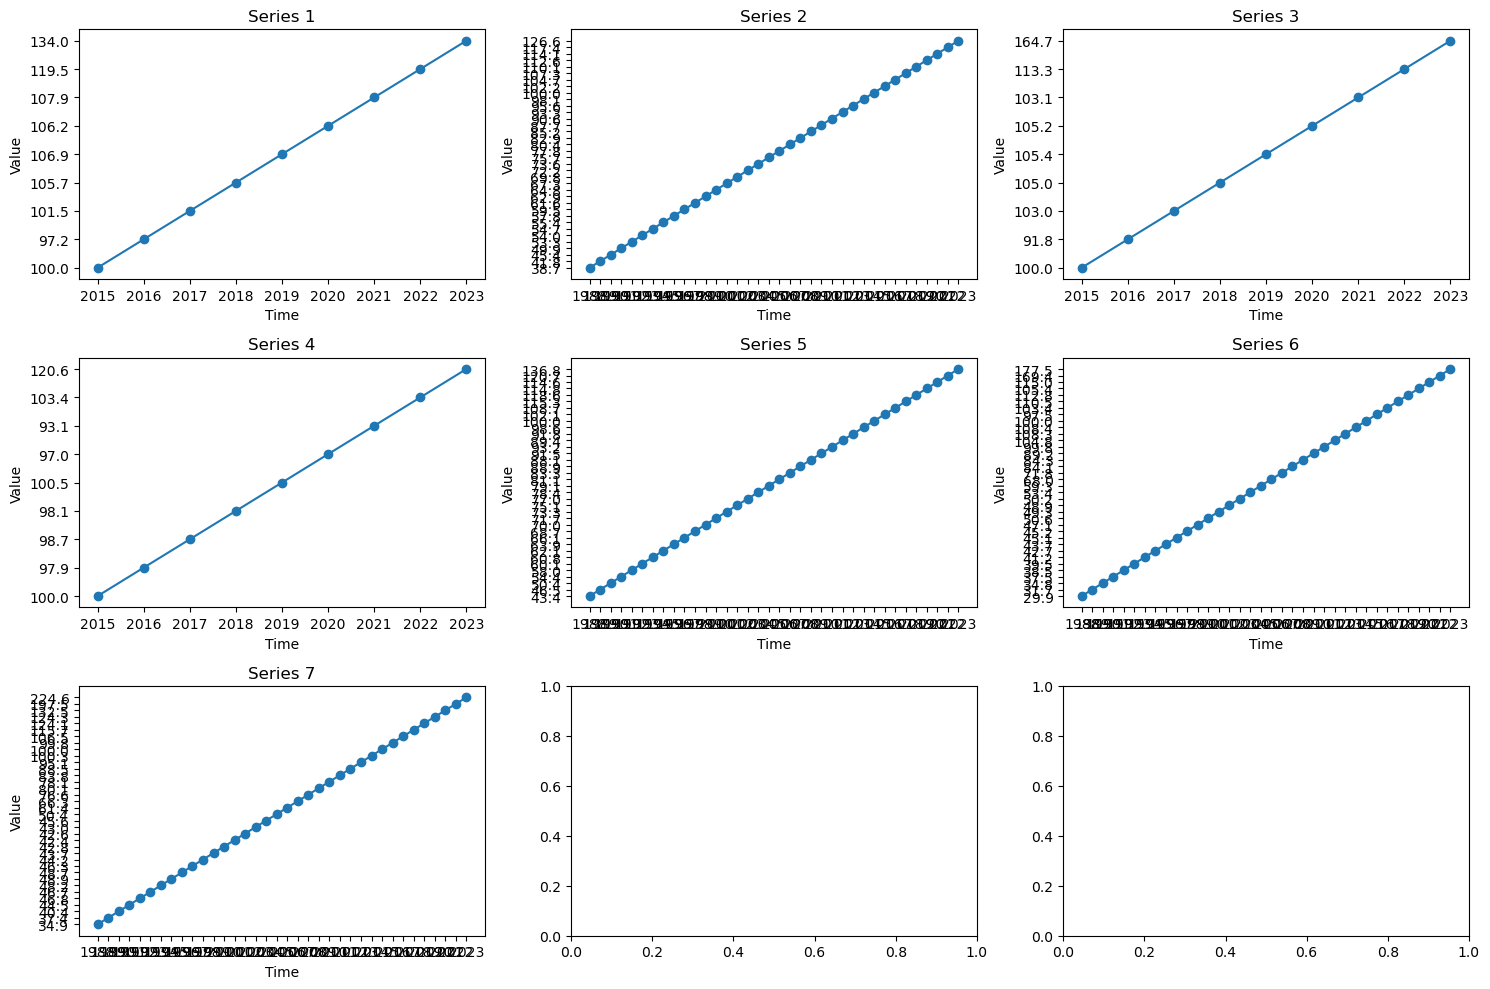

In [29]:
import matplotlib.pyplot as plt
import requests
import json

urls = [
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2i9.json",  
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l528.json",
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2mc.json",
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2m9.json",
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l552.json", 
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l5jj.json",
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l53e.json",
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l2su.json", 
"https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l52w.json"
]

# Set up a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, url in enumerate(urls):
    try:
        # Fetch the JSON data
        response = requests.get(url)
        data = response.json()

        # Extract 'time' and 'value' from each entry in 'years' array
        time = [entry["date"] for entry in data.get("years", []) if "date" in entry]
        values = [entry["value"] for entry in data.get("years", []) if "value" in entry]
        
        # Plot each dataset
        ax = axs[i // 3, i % 3]
        ax.plot(time, values, marker='o')  # Use markers to highlight data points
        ax.set_title(f"Series {i + 1}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")

    except Exception as e:
        print(f"Error loading data from {url}: {e}")

# Adjust layout and display plot
plt.tight_layout()
plt.show()

Error loading data from https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l2su.json: Extra data: line 1 column 4 (char 3)
Error loading data from https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l52w.json: Extra data: line 1 column 4 (char 3)


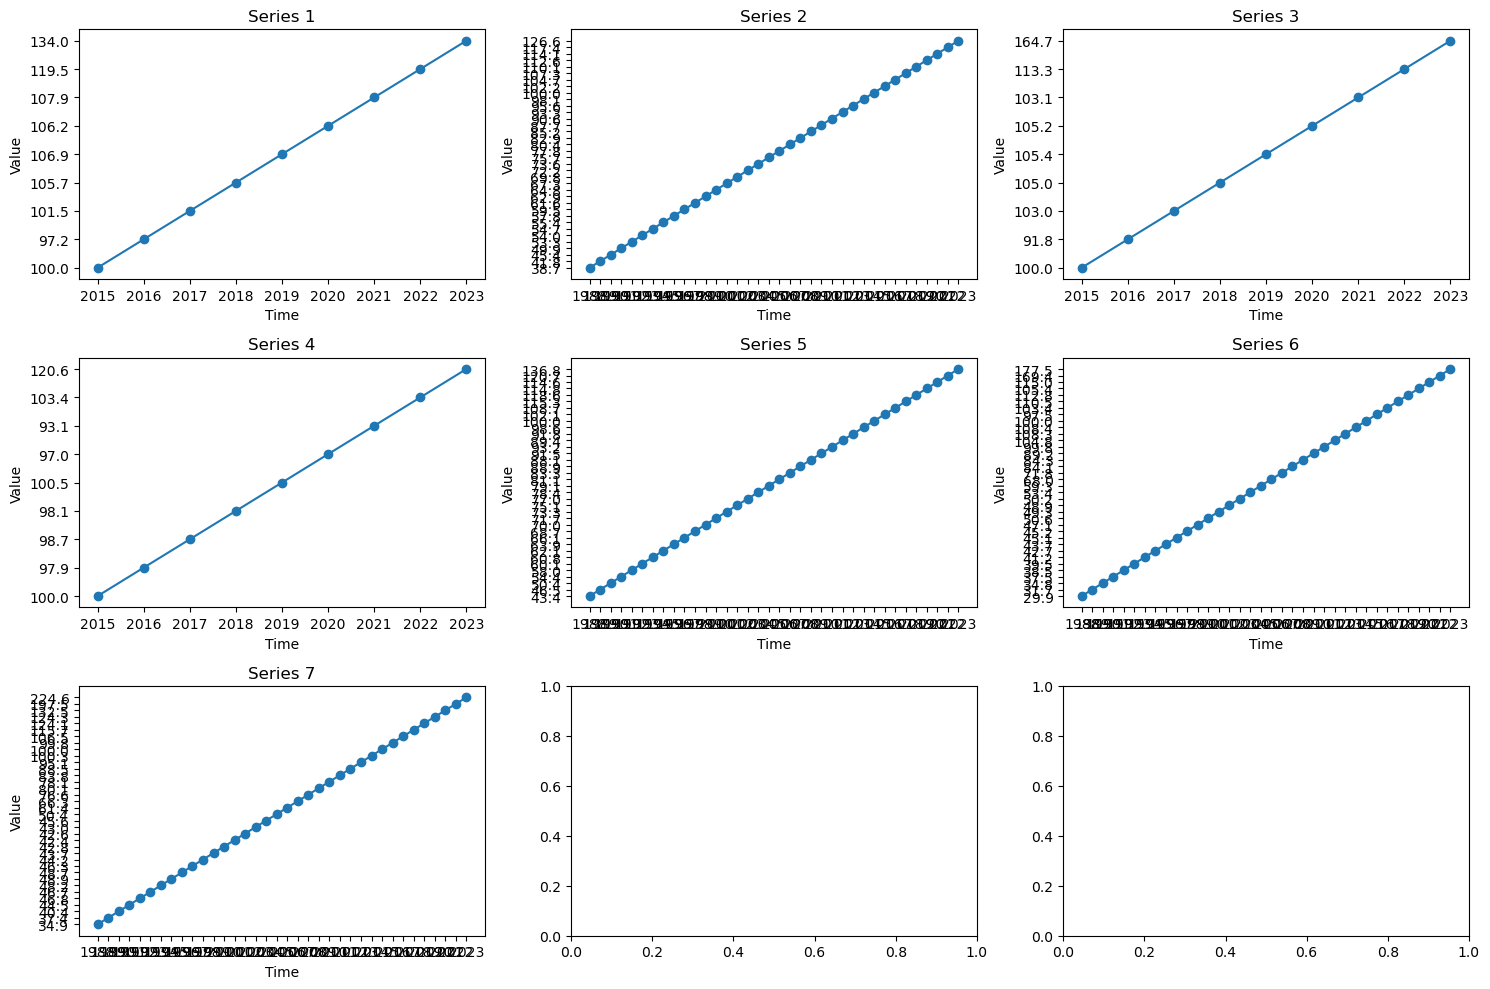

In [30]:
import matplotlib.pyplot as plt
import requests
import json

# List of JSON URLs
urls = [
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2i9.json",  
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l528.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2mc.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2m9.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l552.json", 
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l5jj.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l53e.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l2su.json", 
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l52w.json"
]

# Set up a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for i, url in enumerate(urls):
    try:
        # Fetch the JSON data
        response = requests.get(url)
        data = response.json()

        # Extract 'time' and 'value' from each entry in 'years' array
        time = [entry["date"] for entry in data.get("years", []) if "date" in entry]
        values = [entry["value"] for entry in data.get("years", []) if "value" in entry]
        
        # Plot each dataset
        ax = axs[i // 3, i % 3]
        ax.plot(time, values, marker='o')  # Use markers to highlight data points
        ax.set_title(f"Series {i + 1}")
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")

    except Exception as e:
        print(f"Error loading data from {url}: {e}")

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [32]:
import requests
import pandas as pd

urls = [
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2i9.json",  
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l528.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2mc.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/j2m9.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l552.json", 
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l5jj.json",
    "https://raw.githubusercontent.com/miswilson/miswilson.github.io/refs/heads/main/l53e.json"
]


all_data = []


for url in urls:
    try:
       
        response = requests.get(url)
        data = response.json()
        

        all_data.extend(data.get("years", []))
    
    except Exception as e:
        print(f"Error loading data from {url}: {e}")


df6 = pd.DataFrame(all_data)


print(df6)


TypeError: Cannot convert numpy.ndarray to numpy.ndarray

In [34]:
import requests
import json
import os

# url = "https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7ca/mm23/data"
url = "https://api.beta.ons.gov.uk/v1/data?uri=/economy/inflationandpriceindices/timeseries/{}/mm23/data"

series_ids = ['l525', 'l52f']
# clothing and footwear, goods
output_dir = "ons_series_data"
os.makedirs(output_dir, exist_ok=True)


def download_series(series_id):
    try:
        response = requests.get(url.format(series_id))
        response.raise_for_status()

        file_path = os.path.join(output_dir, f"{series_id}.json")
        with open(file_path, "w") as json_file:
            json.dump(response.json(), json_file, indent=4)
        
        print(f"Downloaded series {series_id} and saved to {file_path}")
        print(response.json())
        print()
    except requests.exceptions.RequestException as e:
        print(f"Failed to download series {series_id}: {e}")

for series_id in series_ids:
    print(series_id)
    download_series(series_id)


l525
Downloaded series l525 and saved to ons_series_data/l525.json
{'years': [{'date': '1988', 'value': '197.4', 'label': '1988', 'year': '1988', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1989', 'value': '206.0', 'label': '1989', 'year': '1989', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1990', 'value': '213.6', 'label': '1990', 'year': '1990', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1991', 'value': '217.1', 'label': '1991', 'year': '1991', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1992', 'value': '214.4', 'label': '1992', 'year': '1992', 'month': '', 'quarter': '', 'sourceDataset': 'MM23', 'updateDate': '2018-12-19T00:00:00.000Z'}, {'date': '1993', 'value': '210.8', 'label': '1993', 'year': '1993', 'month': '', 'quarter': '', 'sourc